# Project 04: Loan Status Prediction Using Random Forest Algorithm

## Abstract

Loan default prediction is a critical task in the financial and banking sector, as it directly impacts risk management and decision-making processes. This project focuses on developing a machine learning–based classification model using the **Random Forest algorithm** to predict the loan status of applicants. By analyzing historical loan application data and borrower-related features, the proposed system aims to classify loans as either approved or defaulted with high accuracy. The Random Forest model is selected due to its robustness, ability to handle non-linear relationships, and resistance to overfitting.

## 1. Introduction

In modern financial institutions, loan approval and risk assessment have become increasingly data-driven. Traditional rule-based systems often fail to capture complex relationships among borrower attributes, leading to suboptimal decisions. Machine learning techniques provide an effective solution by learning patterns from historical data.

This project addresses the problem of **loan status prediction**, where the objective is to determine whether a loan applicant is likely to repay the loan or default. Accurate prediction helps financial institutions minimize credit risk, improve profitability, and ensure sustainable lending practices.

## 2. Problem Statement

The primary objective of this study is to build a predictive model that can classify loan applications into different loan status categories based on applicant information. The problem is formulated as a **supervised classification task**, where historical loan data with known outcomes is used to train the model.


## 3. Dataset Description

The dataset used in this project consists of historical loan records containing both numerical and categorical features. These features represent applicant demographics, financial status, and loan-related information.

### Key Features Include:

A typical loan dataset contains the following features:

| Feature           | Description               |
| ----------------- | ------------------------- |
| Gender            | Male / Female             |
| Married           | Applicant married or not  |
| Dependents        | Number of dependents      |
| Education         | Graduate / Not Graduate   |
| Self_Employed     | Employment type           |
| ApplicantIncome   | Applicant income          |
| CoapplicantIncome | Co-applicant income       |
| LoanAmount        | Loan amount requested     |
| Loan_Amount_Term  | Loan repayment term       |
| Credit_History    | Credit history (0 or 1)   |
| Property_Area     | Urban / Semiurban / Rural |
| Loan_Status       | Target variable (Y/N)     |

The target variable is **Loan Status**, which indicates whether the loan was approved or defaulted.


## 4. Data Preprocessing

To ensure high-quality input data for model training, several preprocessing steps were applied:

* Handling missing values using appropriate statistical techniques
* Encoding categorical variables into numerical representations
* Converting object-type features into numeric or categorical formats
* Removing outliers where necessary
* Splitting the dataset into training and testing subsets

These steps help improve model performance and generalization.

## 5. Methodology

### 5.1 Random Forest Algorithm

Random Forest is an ensemble learning technique that constructs multiple decision trees during training and outputs the final prediction based on majority voting. It reduces overfitting by averaging multiple trees and improves predictive accuracy.

**Advantages of Random Forest:**

* Handles both numerical and categorical data effectively
* Robust against noise and overfitting
* Captures complex feature interactions
* Performs well on tabular financial datasets


### 5.2 Model Training

The Random Forest classifier was trained using the preprocessed training dataset. Hyperparameters such as the number of trees and tree depth were tuned to achieve optimal performance.


## 6. Model Evaluation

The performance of the trained model was evaluated using standard classification metrics:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix

These metrics provide a comprehensive understanding of the model’s predictive capability, especially in identifying high-risk loan applicants.


## 7. Results and Discussion

The Random Forest model demonstrated strong predictive performance in classifying loan status. The ensemble approach enabled the model to capture complex patterns in the data, resulting in improved accuracy compared to traditional single-model approaches. The results indicate that Random Forest is a reliable and effective algorithm for loan status prediction.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('data/loan.csv')

In [3]:
# printing the first 5 rows of the dataframe
loan_dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [5]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
if 'Loan_ID' in loan_dataset .columns:
    df = loan_dataset.drop('Loan_ID', axis=1)

In [10]:
# Handle Missing Values (Simple student-level approach)
# Fill text columns with the most common value (mode)
# Fill number columns with the average (median)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [11]:
# Encode Categorical Data (Change text to numbers)
le = LabelEncoder()
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
# printing the first 5 rows of the dataframe
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [13]:
# Dependent column values
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [14]:
# replacing the value of 3+ to 4
loan_dataset = df.replace(to_replace='3+', value=4)

In [15]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

## Data Visualization

<Axes: xlabel='Education', ylabel='count'>

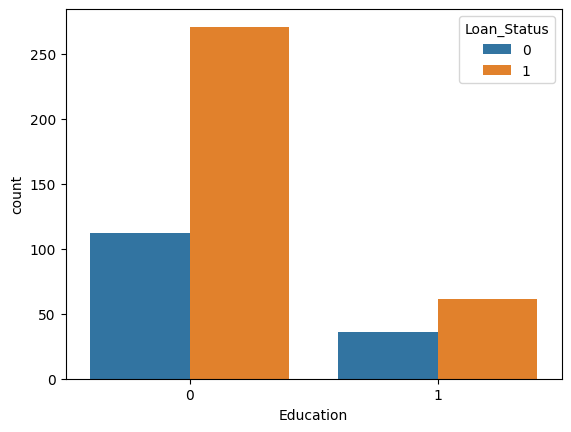

In [16]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

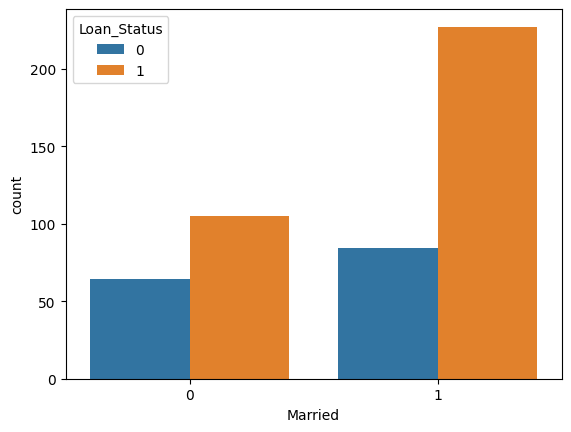

In [17]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [18]:
loan_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [19]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

## Train Test Split

In [20]:
X_train, X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.2,stratify=Y,random_state=42
)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (384, 11) (96, 11)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Classifier Machine Model Training

In [23]:
# 5. Model Training (Random Forest)
# Hyperparameters set for a balance between bias and variance
rf_model = RandomForestClassifier(n_estimators=200, 
                                 max_depth=10, 
                                 random_state=42)
rf_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [24]:
# 6. Performance Evaluation
predictions = rf_model.predict(X_test_scaled)
print(f"\nModel Accuracy: {accuracy_score(Y_test, predictions):.4f}")
print("\nClassification Report:\n", classification_report(Y_test, predictions))



Model Accuracy: 0.8438

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.86      0.92      0.89        66

    accuracy                           0.84        96
   macro avg       0.83      0.80      0.81        96
weighted avg       0.84      0.84      0.84        96



In [25]:
import joblib

joblib.dump(rf_model, 'loan_rf_model.pkl')
print("Model saved successfully!")

Model saved successfully!


In [26]:
joblib.dump(scaler, "model/loan_scaler.pkl")

['model/loan_scaler.pkl']

In [27]:
loan_dataset.to_csv("data/loan_status_prdiction.csv", index=False)

In [28]:
print("\nAssets Saved: 'loan_rf_model.pkl' and 'loan_scaler.pkl'")


Assets Saved: 'loan_rf_model.pkl' and 'loan_scaler.pkl'


## 8. Conclusion

This project successfully demonstrates the application of the Random Forest algorithm for predicting loan status. By leveraging historical loan data and machine learning techniques, the proposed system can assist financial institutions in making informed lending decisions. The model can be further enhanced by incorporating additional features, advanced hyperparameter tuning, or comparing performance with other algorithms such as XGBoost or LightGBM.